# Data Mining - Project
## Group Members
|Name|StudentID|
|:-----------:|:--------:|
|Fabio Lopes|20200597|
|Filipe Costa|20201041|
|Jorge Pereira|20201085|


In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv('donors.csv')

C:\Users\Jorge\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,...,7.741935,95515,0,L,4,E,X,X,X,C
1,1,2014-01-01,BOA,1,CA,91326,,,1972-02-01,0,...,15.666667,148535,0,L,2,G,X,X,X,A
2,2,2010-01-01,AMH,1,NC,27017,,,NaN,0,...,7.481481,15078,1,L,4,E,X,X,X,C
3,3,2007-01-01,BRY,0,CA,95953,,,1948-01-01,0,...,6.812500,172556,1,L,4,E,X,X,X,C
4,4,2006-01-01,,0,FL,33176,,,1940-01-01,0,...,6.864865,7112,1,L,2,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,95407,2016-01-01,ASE,1,AK,99504,,,NaN,0,...,25.000000,184568,0,L,1,G,X,X,X,C
95408,95408,2016-01-01,DCD,1,TX,77379,,,1970-01-01,0,...,20.000000,122706,1,L,1,F,X,X,X,A
95409,95409,2015-01-01,MBC,1,MI,48910,,,1958-01-01,0,...,8.285714,189641,1,L,3,E,X,X,X,B
95410,95410,2006-01-01,PRV,0,CA,91320,,,1960-05-01,0,...,12.146341,4693,1,L,4,F,X,X,X,A


In [4]:
numericDf = df._get_numeric_data()
categoricalDF = df.drop(numericDf.columns, axis = 1)
print('Numerical columns: ' + str(len(numericDf.columns)) +  '\nCategorical columns: ' + str(len(categoricalDF.columns)))

Numerical columns: 351
Categorical columns: 125


# Categorical Data Preparation

In [5]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
ColumnsToPassOver = ['ODATEDW',
                    'OSOURCE',
                    'TCODE',
                    'STATE',
                    'CHILD03',
                    'CHILD07',
                    'CHILD12',
                    'CHILD18',
                    'NUMCHLD',
                    'INCOME',
                    'GENDER',
                    'WEALTH1',
                    'HIT',
                    'MBCRAFT',
                    'MBGARDEN',
                    'MBBOOKS',
                    'MBCOLECT',
                    'MAGFAML',
                    'MAGFEM',
                    'MAGMALE',
                    'PUBGARDN',
                    'PUBCULIN',
                    'PUBHLTH',
                    'PUBDOITY',
                    'PUBNEWFN',
                    'PUBPHOTO',
                    'PUBOPP',
                    'DATASRCE',
                    'MALEMILI',
                    'MALEVET',
                    'VIETVETS',
                    'WWIIVETS',
                    'LOCALGOV',
                    'STATEGOV',
                    'FEDGOV',
                    'WEALTH2',
                    'LIFESRC',
                    'CARDPROM',
                    'NUMPROM',
                    'CARDPM12',
                    'NUMPRM12',
                    'RAMNTALL',
                    'NGIFTALL',
                    'CARDGIFT',
                    'MINRAMNT',
                    'MAXRAMNT',
                    'LASTGIFT',
                    'TIMELAG',
                    'AVGGIFT',
                    'HPHONE_D',
                    'GEOCODE2'
                    ]

In [7]:
dataprep = pd.DataFrame(df[ColumnsToPassOver])

In [8]:
# MAILCODE variable indicates if the address is ok or not, transforming in Boolean.
def prepMAILCODE(Code):
    if Code == 'B':
        return 0 #Bad Address
    else:
        return 1 #Address is OK

dataprep['MAILCODE'] = df['MAILCODE'].apply(prepMAILCODE)

In [9]:
# ZIP has some incorrect characters. Cleaning that up.
def prepZIP(ZIP):
    return ZIP.replace('-','')

dataprep['ZIP'] = df['ZIP'].apply(prepZIP)

In [10]:
# PVASTATE indicates if the donor lives in a state served by the EPVA. Transforming to Bool
def prepPVASTATE(Code):
    if Code == 'P':
        return 1 #PVA State
    else:
        return 0 #EPVA State (Northeastern US)

dataprep['PVASTATE'] = df['PVASTATE'].apply(prepPVASTATE)

In [11]:
# NOEXCH indicates the exchange flag. Transforming to Bool
def prepNOEXCH(Code):
    if Code == 'X':
        return 0 #Can't be exchanged
    else:
        return 1 #Can be exchanged

dataprep['NOEXCH'] = df['NOEXCH'].apply(prepNOEXCH)

In [12]:
# NOEXCH indicates the inhouse flag. Transforming to Bool
def prepRECINHSE(Code):
    if Code == 'X':
        return 1 #Donor has given to PVA's In House program
    else:
        return 0 #Not an In House Record

dataprep['RECINHSE'] = df['RECINHSE'].apply(prepRECINHSE)

In [13]:
# RECP3 indicates the p3 flag. Transforming to Bool
def prepRECP3(Code):
    if Code == 'X':
        return 1 #Donor has given to PVA's P3 program
    else:
        return 0 #Not a P3 Record

dataprep['RECP3'] = df['RECP3'].apply(prepRECP3)

In [14]:
# RECPGVG indicates the planned giving flag. Transforming to Bool
def prepRECPGVG(Code):
    if Code == 'X':
        return 1 #Planned Giving Record
    else:
        return 0 #Not a Planned Giving Record

dataprep['RECPGVG'] = df['RECPGVG'].apply(prepRECPGVG)

In [15]:
# RECSWEEP indicates the sweepstakes flag. Transforming to Bool
def prepRECSWEEP(Code):
    if Code == 'X':
        return 1 #Sweepstakes Record
    else:
        return 0 #Not a Sweepstakes Record

dataprep['RECSWEEP'] = df['RECSWEEP'].apply(prepRECSWEEP)

In [16]:
# MDMAUD handling
# If X, it is not a major donor
# First byte: Recency of Giving
#     C=Current Donor
#     L=Lapsed Donor
#     I=Inactive Donor
#     D=Dormant Donor

# 2nd byte: Frequency of Giving
#     1=One gift in the period of recency
#     2=Two-Four gifts in the period of recency
#     5=Five+ gifts in the period of recency

# 3rd byte: Amount of Giving
#     L=Less than $100(Low Dollar)
#     C=$100-499(Core)
#     M=$500-999(Major)
#     T=$1,000+(Top)

def prepMAJORDONOR(Code):
    if Code[0] == 'X':
        return 0
    else:
        return 1
    
dataprep['MAJORDONOR'] = df['MDMAUD'].apply(prepMAJORDONOR)
dataprep['GIVING_FREQUENCY'] = df['MDMAUD'].apply(lambda x: x[1] if x[0] != 'X' else 0)
dataprep['GIVING_AMOUNT'] = df['MDMAUD'].apply(lambda x: x[2] if x[0] != 'X' else 0)

In [17]:
# DOMAIN handling
# 1st byte = Urbanicity level of the donor's neighborhood
#     U=Urban
#     C=City
#     S=Suburban
#     T=Town
#     R=Rural

# 2nd byte = Socio-Economic status of the neighborhood
#     1 = Highest SES
#     2 = Average SES
#     3 = Lowest SES 
#     (except for Urban communities, where
#       1 = Highest SES, 
#       2 = Above average SES,
#       3 = Below average SES, 
#       4 = Lowest SES.)

def prepDONORURBANICITY(Code):
    if Code == ' ':
        return 0 #Empty
    elif Code != 'U2' and Code != 'U3':
        if Code[1] == '1':
            return 1 #Highest SES
        elif Code[1] == '2':
            return 3 #Average SES
        else:
            return 5 #Lowest SES
    else:
        if Code[1] == '2':
            return 2 #Above average SES
        else:
            return 4 #Below average SES

dataprep['DONOR_URBANICITY'] = df['DOMAIN'].apply(prepDONORURBANICITY)

In [18]:
# HOMEOWNR handling
def prepHOMEOWNR(Code):
    if Code[0] == 'H':
        return 1 #Home owner
    else:
        return 0 #Unknown
    
dataprep['HOMEOWNR'] = df['HOMEOWNR'].apply(prepHOMEOWNR)

In [19]:
# CHILDXX handling
def prepCHILD(Code):
    if Code[0] == 'F':
        return 1 #Female
    elif Code[0] == 'M':
        return 2 #Male
    elif Code[0] == 'M':
        return 3 #Both
    else:
        return 0 #Empty
    
dataprep['CHILD03'] = df['CHILD03'].apply(prepCHILD)
dataprep['CHILD07'] = df['CHILD07'].apply(prepCHILD)
dataprep['CHILD12'] = df['CHILD12'].apply(prepCHILD)
dataprep['CHILD18'] = df['CHILD18'].apply(prepCHILD)

In [20]:
# SOLP3 handling
def prepSOLP3(Code):
    if Code == '00':
        return -1 #Do Not Solicit or Mail
    elif Code == ' ':
        return 0 #Can be mailed
    else:
        return int(Code) #Number of solicitations
    
dataprep['MAIL_SOLICITATION'] = df['SOLP3'].apply(prepSOLP3)

In [21]:
# SOLIH handling
def prepSOLIH(Code):
    if Code == '00':
        return -1 #Do Not Solicit or Mail
    elif Code == ' ':
        return 0 #Can be mailed
    else:
        return int(Code) #Number of solicitations
    
dataprep['INHOUSE_SOLICITATION'] = df['SOLIH'].apply(prepSOLP3)

In [22]:
# PEPSTRFL
def prepPEPSTRFL(Code):
    if Code[0] == 'X':
        return 1 #Has PEP Star RFA Status
    else:
        return 0 #Not considered to be a PEP Star
    
dataprep['PEPSTRFL'] = df['PEPSTRFL'].apply(prepPEPSTRFL)

In [23]:
# handling Interests by donor

dataprep['COLLECT1'] = df['COLLECT1'].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['VETERANS'] = df['VETERANS'].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['BIBLE'   ] = df['BIBLE'   ].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['CATLG'   ] = df['CATLG'   ].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['HOMEE'   ] = df['HOMEE'   ].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['PETS'    ] = df['PETS'    ].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['CDPLAY'  ] = df['CDPLAY'  ].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['STEREO'  ] = df['STEREO'  ].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['PCOWNERS'] = df['PCOWNERS'].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['PHOTO'   ] = df['PHOTO'   ].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['CRAFTS'  ] = df['CRAFTS'  ].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['FISHER'  ] = df['FISHER'  ].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['GARDENIN'] = df['GARDENIN'].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['BOATS'   ] = df['BOATS'   ].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['WALKER'  ] = df['WALKER'  ].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['KIDSTUFF'] = df['KIDSTUFF'].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['CARDS'   ] = df['CARDS'   ].apply(lambda x: 1 if x.lower() == 'y' else 0)
dataprep['PLATES'  ] = df['PLATES'  ].apply(lambda x: 1 if x.lower() == 'y' else 0)

In [24]:
# Converting DOB to datetime object
dataprep['MAXADATE'] = pd.to_datetime(df['MAXADATE'])
dataprep['MINRDATE'] = pd.to_datetime(df['MINRDATE'])
dataprep['MAXRDATE'] = pd.to_datetime(df['MAXRDATE'])
dataprep['LASTDATE'] = pd.to_datetime(df['LASTDATE'])
dataprep['FISTDATE'] = pd.to_datetime(df['FISTDATE'])
dataprep['NEXTDATE'] = pd.to_datetime(df['NEXTDATE'])
dataprep['DOB'     ] = pd.to_datetime(df['DOB'     ])

In [25]:
# Computing AGE from DOB
dataprep['AGE'] = (pd.Timestamp('now') - pd.to_datetime(df['DOB'])).astype('<m8[Y]')

In [26]:
#Chaning the categorical values in dataframe
df[ColumnsToPassOver] = dataprep[ColumnsToPassOver]

In [27]:
numericDf = dataprep._get_numeric_data()
categoricalDF = dataprep.drop(numericDf.columns, axis = 1)
print('Numerical columns: ' + str(len(numericDf.columns)) +  '\nCategorical columns: ' + str(len(categoricalDF.columns)))

Numerical columns: 76
Categorical columns: 17


# Missing Values

In [28]:
numericDf = df._get_numeric_data()
categoricalDF = df.drop(numericDf.columns, axis = 1)
print('Numerical columns: ' + str(len(numericDf.columns)) +  '\nCategorical columns: ' + str(len(categoricalDF.columns)))

Numerical columns: 354
Categorical columns: 121


In [29]:
#imputer = KNNImputer(n_neighbors = 5, weights = 'uniform')

#df[numericDf.columns] = pd.DataFrame(imputer.fit_transform(df[numericDf.columns]._get_numeric_data()))

In [52]:
saveCopyDf = df.copy()

In [58]:
df

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,0.0,IL,61081,,,1957-12-01,0,,...,7.741935,95515.0,0.0,L,4.0,E,X,X,X,C
1,2014-01-01,BOA,1.0,CA,91326,,,1972-02-01,0,,...,15.666667,148535.0,0.0,L,2.0,G,X,X,X,A
2,2010-01-01,AMH,1.0,NC,27017,,,NaN,0,,...,7.481481,15078.0,1.0,L,4.0,E,X,X,X,C
3,2007-01-01,BRY,0.0,CA,95953,,,1948-01-01,0,,...,6.812500,172556.0,1.0,L,4.0,E,X,X,X,C
4,2006-01-01,,0.0,FL,33176,,,1940-01-01,0,X,...,6.864865,7112.0,1.0,L,2.0,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,2016-01-01,ASE,1.0,AK,99504,,,NaN,0,,...,25.000000,184568.0,0.0,L,1.0,G,X,X,X,C
95408,2016-01-01,DCD,1.0,TX,77379,,,1970-01-01,0,,...,20.000000,122706.0,1.0,L,1.0,F,X,X,X,A
95409,2015-01-01,MBC,1.0,MI,48910,,,1958-01-01,0,,...,8.285714,189641.0,1.0,L,3.0,E,X,X,X,B
95410,2006-01-01,PRV,0.0,CA,91320,,,1960-05-01,0,X,...,12.146341,4693.0,1.0,L,4.0,F,X,X,X,A


In [64]:
q25 = df.quantile(.25)
q75 = df.quantile(.75)
iqr = (q75 - q25)

val = 20

upperLim = q75 + val * iqr
lowerLim = q25 - val * iqr

filters = []
for column in numericDf.columns:
    llim = lowerLim[column]
    ulim = upperLim[column]
    filters.append(df[column].between(llim, ulim, inclusive=True))

dfFilter = df[np.all(filters, 0)]
print('Percentage of data kept after removing outliers:', np.round(dfFilter.shape[0] / df.shape[0], 4))

Percentage of data kept after removing outliers: 0.0267


In [65]:
dfFilter

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
11,2016-01-01,CSM,1.0,IN,46220,,,1943-01-01,0,,...,12.500000,60127.0,0.0,L,2.0,F,X,X,X,B
44,2012-01-01,IMA,0.0,WI,53221,,,1966-11-01,0,,...,11.655172,1361.0,1.0,L,3.0,F,X,X,X,B
59,2014-01-01,BSH,0.0,IN,46987,,,1970-01-01,0,,...,8.750000,62693.0,0.0,L,1.0,F,X,X,X,C
66,2012-01-01,L01,1.0,FL,34231,,,1938-05-01,0,X,...,15.909091,188800.0,1.0,L,2.0,G,X,X,X,B
92,2015-01-01,CWR,0.0,KY,40214,,,1941-01-01,0,,...,4.428571,56643.0,1.0,L,4.0,D,X,X,X,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95200,2016-01-01,AGS,1.0,WI,53704,,,1988-01-01,0,,...,20.000000,79714.0,1.0,L,1.0,F,X,X,X,B
95228,2015-01-01,GOD,0.0,KS,67645,,,NaN,0,,...,15.000000,106358.0,1.0,L,1.0,F,X,X,X,D
95246,2014-01-01,L06,2.0,MN,55076-,,,1940-01-01,0,,...,5.800000,82570.0,1.0,L,3.0,E,X,X,X,A
95335,2016-01-01,MCO,1.0,MT,59802,,,1967-01-01,0,,...,15.000000,87489.0,1.0,L,1.0,F,X,X,X,C


In [160]:
dfCorrelation = dfFilter[numericDf.columns]

corPearson = dfCorrelation.corr()

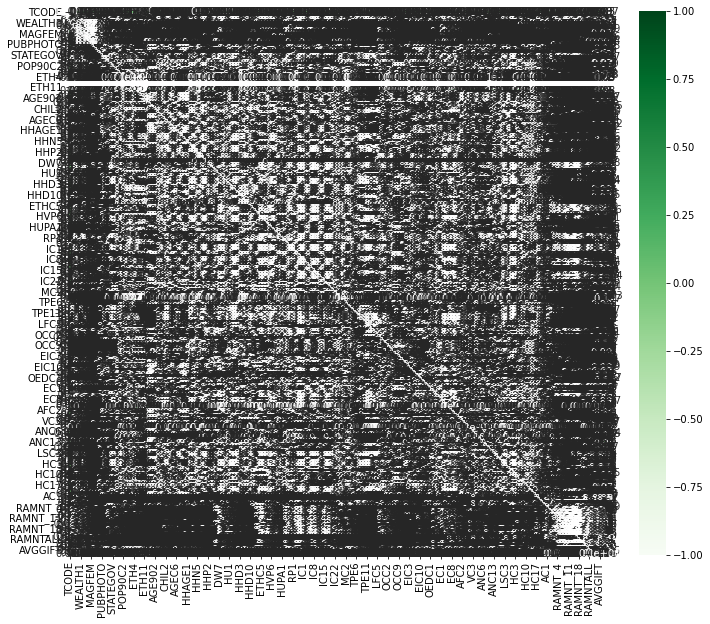

In [69]:
corHeatmap(corPearson)

In [156]:
#print(corPearson.columns) np.any(valeur <= 0.6)

toRemoveList = []

teste = True

for columns in corPearson.columns:
    for columns2 in corPearson.columns:
        if corPearson[columns][columns2] > -0.2 and corPearson[columns][columns2] < 0.2 and columns not in toRemoveList:
            toRemoveList.append(columns)
            

In [157]:
len(toRemoveList)

36

In [158]:
teste1 = df.drop(toRemoveList, axis = 1)

corPearson = teste1.corr()

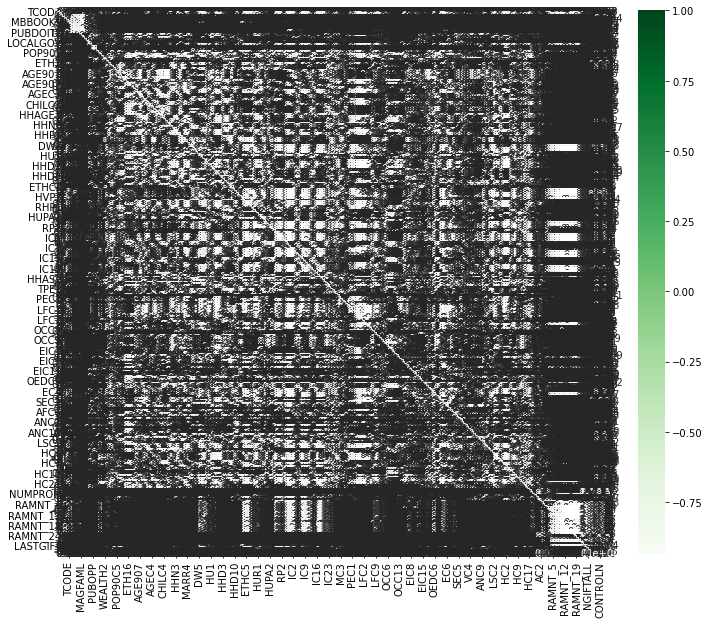

In [159]:
corHeatmap(corPearson)

In [30]:
dfState = pd.DataFrame(df.groupby('STATE')['STATE'].agg({'count'})).sort_values(by=['count'], ascending=False).reset_index()
dfState.head(10)

,STATE,count
0,CA,17343
1,FL,8376
2,TX,7535
3,IL,6420
4,MI,5654
5,NC,4160
6,WA,3577
7,GA,3403
8,IN,2980
9,WI,2795


In [31]:
#pd.DataFrame(df.groupby('TCODE')['TCODE'].agg({'count'})).sort_values(by=['count'], ascending=False).reset_index()
#pd.DataFrame(df.groupby(['STATE', df.DOMAIN.str[:1]]).size())

In [32]:
dfDomain = df.groupby(df.DOMAIN.str[:1], as_index=False)['DOMAIN'].agg(['count']).sort_values(by=['count'], ascending=False).reset_index()
dfDomain

#U=Urban
#C=City
#S=Suburban
#T=Town
#R=Rural

,DOMAIN,count
0,S,21924
1,R,19790
2,C,19689
3,T,19527
4,U,12166
5,,2316


In [33]:
df.groupby(df.DOMAIN, as_index=False)['DOMAIN'].agg(['count']).sort_values(by=['count'], ascending=False)

#See exception in 2nd byte - value 3 is different in Urban communities

,count
DOMAIN,
R2,13623
T2,12369
S1,11503
S2,8530
C2,8264
C1,6145
C3,5280
T1,4982
R3,4809


In [34]:
df.groupby(df['WEALTH2'], as_index=False)['WEALTH2'].agg(['count']).sort_values(by=['count'], ascending=False).reset_index()

,WEALTH2,count
0,9.0,7528
1,8.0,7038
2,7.0,7013
3,6.0,6841
4,5.0,6628
5,4.0,6177
6,3.0,6089
7,2.0,5791
8,1.0,4615
9,0.0,3395


In [35]:
def corHeatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Greens, fmt='.1')
    plt.show()

In [36]:
selectedColumns = ['POP901', 'WEALTH2', 'AGE901', 'MARR1', 'MARR2', 'MARR3','IC3', 'IC5' , 'HHAS1', 'AC1', 'AC2', 'POP90C4', 'POP90C5', 'HHAGE1', 'HHAGE2', 'MALEVET', 'VIETVETS', 'WWIIVETS']

#POP901          Number of Persons
#WEALTH2         Wealth Rating
#AGE901          Median Age of Population
#MARR1           Percent Married
#MARR2           Percent Separated or Divorced
#MARR3           Percent Widowed
#IC3             Average Household Income in hundreds
#IC5             Per Capita Income
#HHAS1           Percent Households on Social Security
#AC1             Percent Adults Age 55-59
#AC2             Percent Adults Age 60-64
#POP90C4         Percent Male
#POP90C5         Percent Female
#HHAGE1          Percent Households w/ Person 65+
#HHAGE2          Percent Households w/ Person 65+ Living Alone
#MALEVET         % Males Veterans
#VIETVETS        % Vietnam Vets
#WWIIVETS        % WWII Vets

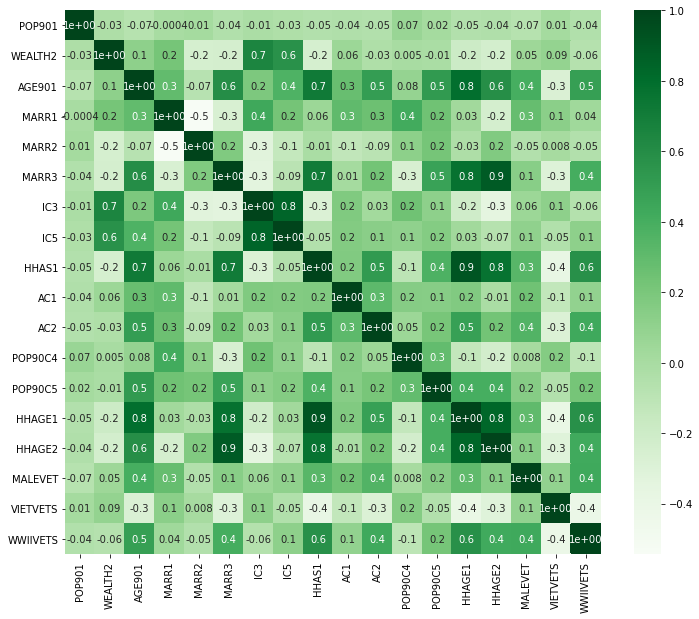

In [37]:
dfCorrelation = df[selectedColumns]

corPearson = dfCorrelation.corr()
corHeatmap(corPearson)

In [38]:
filterDf = df[df['MDMAUD'] != 'XXXX']
filterDf

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
107,2006-01-01,MBC,0.0,FL,32073,,,1958-12-01,0,X,...,37.777778,12105.0,1.0,L,1.0,G,C,1,C,B
371,2008-01-01,LIS,1.0,TX,77511,,,1935-06-01,0,X,...,68.111111,7000.0,1.0,L,1.0,G,D,1,C,A
477,2006-01-01,ASC,1.0,GA,30349,,,1950-01-01,0,X,...,20.000000,14505.0,1.0,L,1.0,G,L,1,C,A
535,2010-01-01,L01,3.0,MO,64633,,,2010-01-01,0,X,...,42.533333,12569.0,1.0,L,2.0,G,C,2,C,D
618,2006-01-01,BHG,0.0,FL,33777,,,NaN,0,X,...,71.750000,185144.0,0.0,L,1.0,G,D,2,C,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94040,2011-01-01,WIG,0.0,CA,92115,,,1958-03-01,0,X,...,70.000000,7402.0,0.0,L,1.0,G,D,1,C,A
94879,2006-01-01,BRE,1.0,SC,29205,,,1962-11-01,0,X,...,29.470588,5907.0,1.0,L,3.0,G,C,1,C,B
95348,2006-01-01,MCC,0.0,CA,92545,,,1956-01-01,0,X,...,95.454545,185087.0,1.0,L,1.0,G,D,2,M,A
95396,2011-01-01,PBL,0.0,CA,94305,,,1934-01-01,0,X,...,72.857143,12322.0,1.0,L,3.0,G,L,2,C,A


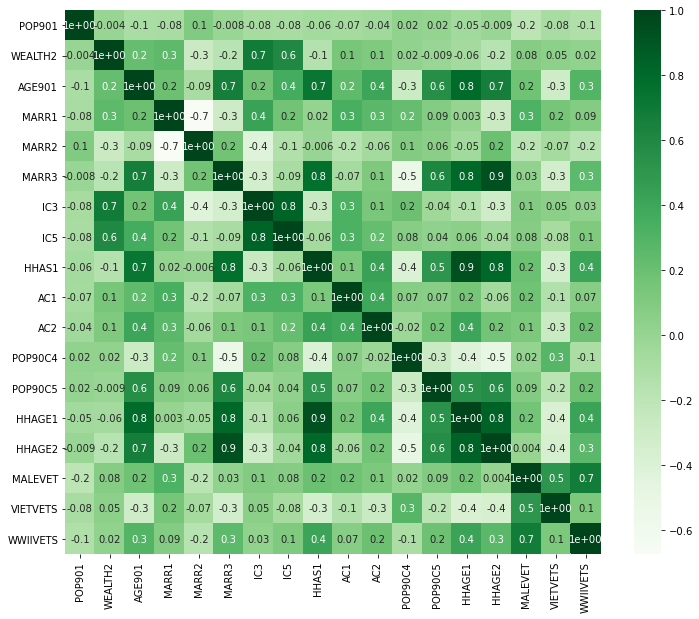

In [39]:
filterDfCorrelation = filterDf[selectedColumns]

corPearson = filterDfCorrelation.corr()
corHeatmap(corPearson)

In [40]:
dfNaNIgnore = df[selectedColumns].copy().dropna()
dfNaNMean = df[selectedColumns].copy().fillna(df.mean())

In [41]:
def inertiaCalculation(df):   
    numberClusters = range(1, 11)
    inertiaResults = []
    for n_clus in numberClusters:
        kmclust = KMeans(n_clusters = n_clus, init = 'k-means++', n_init = 15, random_state=1)
        kmclust.fit(df)
        inertiaResults.append(kmclust.inertia_)
    return inertiaResults

In [42]:
inertiaDfIgnore = inertiaCalculation(dfNaNIgnore)
inertiaDfMean = inertiaCalculation(dfNaNMean)

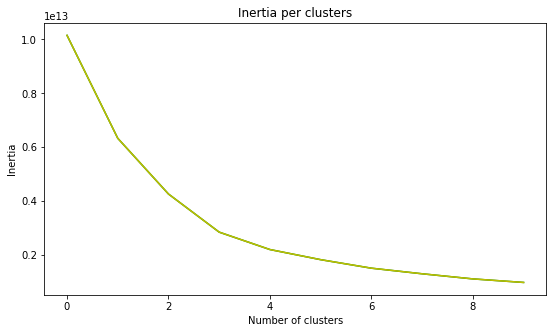

In [43]:
plt.figure(figsize=(9,5))
plt.plot(inertiaDfIgnore, color = 'g')
plt.plot(inertiaDfMean, color = 'y')
plt.ylabel("Inertia")
plt.xlabel("Number of clusters")
plt.title("Inertia per clusters")
plt.show()

#  ============ Testes para estudo dos dados ============ 

In [44]:
#Lapsed Donors
df[df['MDMAUD'].str[0] == 'L']

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
477,2006-01-01,ASC,1.0,GA,30349,,,1950-01-01,0,X,...,20.000000,14505.0,1.0,L,1.0,G,L,1,C,A
2242,2015-01-01,TVH,0.0,CA,90069,,,1954-01-01,0,X,...,200.000000,13048.0,0.0,L,3.0,G,L,1,C,A
6303,2009-01-01,SSS,1.0,CA,92264,,,NaN,0,X,...,72.222222,3305.0,1.0,L,1.0,G,L,2,C,A
9498,2008-01-01,,0.0,MI,48126,,,1931-04-01,0,X,...,55.081081,185088.0,0.0,L,1.0,G,L,1,C,A
11179,2011-01-01,TWM,1.0,CA,95051,,,1950-05-01,0,X,...,110.000000,14464.0,0.0,L,1.0,G,L,1,C,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90843,2012-01-01,LHJ,1.0,IL,60045,,,1964-08-01,0,X,...,85.400000,11877.0,0.0,L,1.0,G,L,1,C,A
90856,2014-01-01,AGS,0.0,CA,95122,,,NaN,0,X,...,59.285714,12319.0,1.0,L,1.0,G,L,1,C,A
91680,2015-01-01,CHT,1.0,CA,94121,,,1957-01-01,0,X,...,26.875000,12090.0,0.0,L,3.0,F,L,2,C,A
93947,2007-01-01,ASC,28.0,TX,77098-,,,1942-04-01,0,X,...,75.800000,5719.0,0.0,L,1.0,G,L,1,C,A


In [45]:
#Different types of donors
dfMDMAUD = df.groupby(['MDMAUD'], as_index=False)['MDMAUD'].agg(['count'])
dfMDMAUD

,count
MDMAUD,
C1CM,65
C1LM,8
C1MM,1
C2CM,24
C2LM,3
C2MM,3
C5CM,3
C5MM,1
C5TM,1


In [46]:
#Different types of lapsed donors
dfMDMAUD_L = df[df['MDMAUD'].str[0] == 'L'].groupby(['MDMAUD'], as_index=False)['MDMAUD'].agg(['count'])
dfMDMAUD_L

,count
MDMAUD,
L1CM,44
L1LM,8
L1MM,1
L2CM,15
L2LM,1
L2TM,1


In [47]:
#Count of the different types of donors (1st byte)
df.groupby(df.MDMAUD.str[:1], as_index=False)['MDMAUD'].agg(['count'])

,count
MDMAUD,
C,109
D,65
I,50
L,70
X,95118


In [48]:
#Count on the frequency of giving (2nd byte)
df.groupby(df.MDMAUD.str[2:3], as_index=False)['MDMAUD'].agg(['count'])

,count
MDMAUD,
C,249
L,23
M,17
T,5
X,95118


In [49]:
#% Males active in the Military
df['MALEMILI']

0         0.0
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
95407    14.0
95408     0.0
95409     0.0
95410     0.0
95411     1.0
Name: MALEMILI, Length: 95412, dtype: float64

In [50]:
#4th byte: Blank/meaningless/filler - 'X' indicates that the donor is not a major donor.
df.groupby(df.MDMAUD.str[3:4], as_index=False)['MDMAUD'].agg(['count'])

,count
MDMAUD,
M,294
X,95118


In [51]:
df['LASTDATE']

0        2015-12-01
1        2015-12-01
2        2015-12-01
3        2015-12-01
4        2016-01-01
            ...    
95407    2016-02-01
95408    2016-03-01
95409    2016-10-01
95410    2017-01-01
95411    2016-12-01
Name: LASTDATE, Length: 95412, dtype: object